In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler

In [3]:
project_dir = Path("__file__").resolve().parents[2]
project_dir

PosixPath('/Users/b1017579/Documents/PhD/Projects/14-temporal-granularity/temporal_granularity')

In [107]:
pv = pd.read_csv('{}/data/processed/resources/pv_processed.csv'.format(project_dir))
pv.datetime=pd.to_datetime(pv.datetime)
pv.head()

,Unnamed: 0,datetime,capacity_factor
0,0,1980-01-01 00:00:00,0.0
1,1,1980-01-01 01:00:00,0.0
2,2,1980-01-01 02:00:00,0.0
3,3,1980-01-01 03:00:00,0.0
4,4,1980-01-01 04:00:00,0.0


In [108]:
wind = pd.read_csv('{}/data/processed/resources/wind_processed.csv'.format(project_dir))
wind = wind.rename(columns={"time":"datetime"})
wind.datetime=pd.to_datetime(wind.datetime)
wind.head()

,Unnamed: 0,datetime,offshore,onshore
0,0,1980-01-01 00:00:00,0.2858,0.1496
1,1,1980-01-01 01:00:00,0.2827,0.1502
2,2,1980-01-01 02:00:00,0.2852,0.1485
3,3,1980-01-01 03:00:00,0.2920,0.1470
4,4,1980-01-01 04:00:00,0.3039,0.1489


In [109]:
demand = pd.read_csv('{}/data/processed/demand/electricity_demand.csv'.format(project_dir))
demand['datetime']=pd.to_datetime(demand[' timestamp'])
demand = demand.drop(['id', ' timestamp'], axis=1)
demand = demand.set_index('datetime').resample('h').mean()
demand = demand.reset_index()
demand.head()

,datetime,demand
0,2011-05-27 15:00:00,38859.500000
1,2011-05-27 16:00:00,38657.083333
2,2011-05-27 17:00:00,37497.583333
3,2011-05-27 18:00:00,36146.333333
4,2011-05-27 19:00:00,34741.166667


## Plotting Load Duration Curves

In [110]:
pv['year']=pv.datetime.dt.year
pv.head()

,Unnamed: 0,datetime,capacity_factor,year
0,0,1980-01-01 00:00:00,0.0,1980
1,1,1980-01-01 01:00:00,0.0,1980
2,2,1980-01-01 02:00:00,0.0,1980
3,3,1980-01-01 03:00:00,0.0,1980
4,4,1980-01-01 04:00:00,0.0,1980


In [111]:
pv_sort = pv.sort_values('capacity_factor', ascending=False).reset_index().reset_index()
pv_sort.head()

,level_0,index,Unnamed: 0,datetime,capacity_factor,year
0,0,152483,152483,1997-05-24 11:00:00,0.7364,1997
1,1,152484,152484,1997-05-24 12:00:00,0.7357,1997
2,2,274692,274692,2011-05-03 12:00:00,0.7289,2011
3,3,152676,152676,1997-06-01 12:00:00,0.7273,1997
4,4,274691,274691,2011-05-03 11:00:00,0.7244,2011


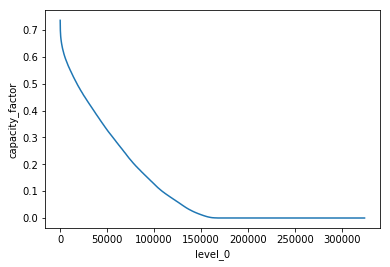

In [10]:
sns.lineplot(data=pv_sort, y='capacity_factor', x='level_0')

In [18]:
pv_each_year = pv.groupby('year').apply(lambda x: x.sort_values('capacity_factor', ascending=False).reset_index().reset_index())
pv_each_year.head()

level_0  index  Unnamed: 0            datetime  capacity_factor  year
year                                                                         
1980 0        0   3252        3252 1980-05-15 12:00:00           0.7226  1980
     1        1   3251        3251 1980-05-15 11:00:00           0.7212  1980
     2        2   3276        3276 1980-05-16 12:00:00           0.7125  1980
     3        3   3275        3275 1980-05-16 11:00:00           0.7103  1980
     4        4   2987        2987 1980-05-04 11:00:00           0.7101  1980

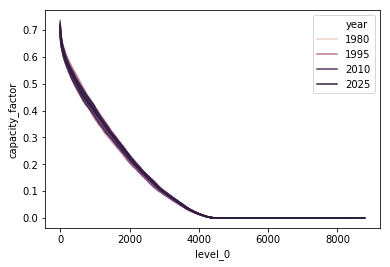

In [35]:
sns.lineplot(data=pv_each_year, hue='year', x='level_0', y='capacity_factor')

In [36]:
# Wind

In [6]:
wind['year'] = wind.datetime.dt.year

In [45]:
wind_each_year = wind.groupby('year').apply(lambda x: x.sort_values('onshore', ascending=False).reset_index().reset_index())
wind_each_year.head()

level_0  index  Unnamed: 0            datetime  offshore  onshore  \
year                                                                        
1980 0        0   6134        6134 1980-09-12 14:00:00    0.9377   0.8792   
     1        1   6133        6133 1980-09-12 13:00:00    0.9291   0.8737   
     2        2   6135        6135 1980-09-12 15:00:00    0.9376   0.8733   
     3        3   6132        6132 1980-09-12 12:00:00    0.9178   0.8588   
     4        4   6136        6136 1980-09-12 16:00:00    0.9328   0.8547   

        year  
year          
1980 0  1980  
     1  1980  
     2  1980  
     3  1980  
     4  1980

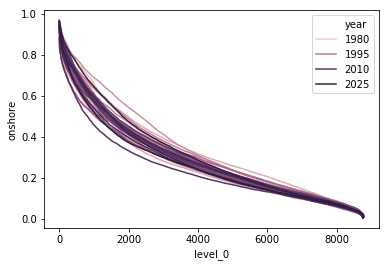

In [47]:
sns.lineplot(data=wind_each_year, hue='year', x='level_0', y='onshore')

In [11]:
offshore_each_year = wind.groupby('year').apply(lambda x: x.sort_values('offshore', ascending=False).reset_index().reset_index())
# sns.lineplot(data=offshore_each_year, hue='year', x='level_0', y='offshore')
offshore_each_year.head()

level_0  index  Unnamed: 0            datetime  offshore  onshore  \
year                                                                        
1980 0        0   8366        8366 1980-12-14 14:00:00    0.9771   0.5869   
     1        1    487         487 1980-01-21 07:00:00    0.9736   0.7389   
     2        2   7732        7732 1980-11-18 04:00:00    0.9733   0.7499   
     3        3    486         486 1980-01-21 06:00:00    0.9717   0.6903   
     4        4   8367        8367 1980-12-14 15:00:00    0.9713   0.6921   

        year  
year          
1980 0  1980  
     1  1980  
     2  1980  
     3  1980  
     4  1980

In [101]:
demand['year'] = demand.datetime.dt.year
demand['demand_scaled'] = demand.groupby('year')[' demand'].apply(lambda x: (x-min(x))/(max(x)-min(x)))
demand_each_year = demand.groupby('year').apply(lambda x: x.sort_values('demand_scaled', ascending=False).reset_index().reset_index())
demand_each_year.head()


level_0  index            datetime        demand  year  demand_scaled
year                                                                         
2011 0        0   3668 2011-10-27 11:00:00  73662.666667  2011       1.000000
     1        1    596 2011-06-21 11:00:00  70619.083333  2011       0.941340
     2        2   4509 2011-12-01 12:00:00  63786.666667  2011       0.809657
     3        3   3501 2011-10-20 12:00:00  55408.416667  2011       0.648180
     4        4   4946 2011-12-19 17:00:00  54453.833333  2011       0.629782

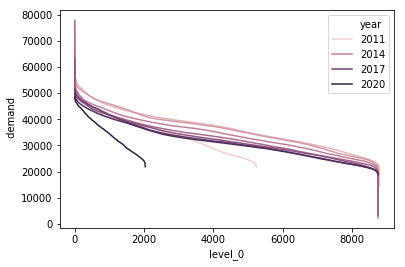

In [103]:
sns.lineplot(data=demand_each_year, hue='year', x='level_0', y=' demand')

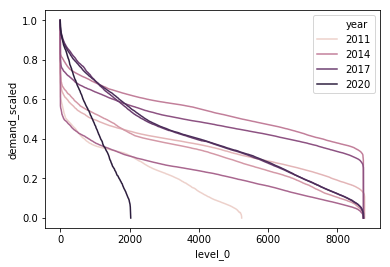

In [102]:
sns.lineplot(data=demand_each_year, hue='year', x='level_0', y='demand_scaled')

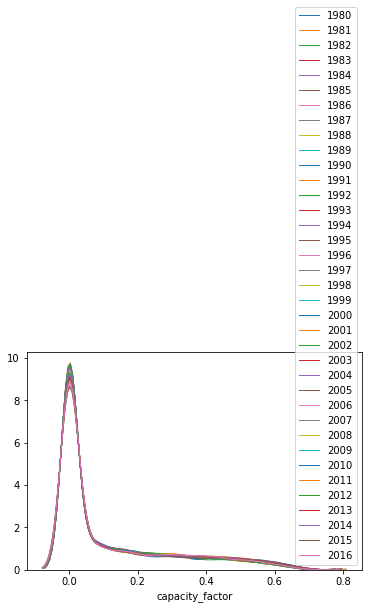

In [19]:
for year in pv_each_year.year.unique():
    # Subset to the airline
    subset = pv_each_year[pv_each_year['year'] == year]
    
    # Draw the density plot
    sns.distplot(subset['capacity_factor'], hist = False, kde = True,
                 kde_kws = {'linewidth': 1},
                 label = year)

In [112]:
solar_summary = pv.groupby('year')['capacity_factor'].describe()
solar_summary

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1980,8784.0,0.114993,0.174955,0.0,0.0,0.00110,0.185475,0.7226
1981,8760.0,0.110160,0.167212,0.0,0.0,0.00105,0.180825,0.7076
1982,8760.0,0.114089,0.173012,0.0,0.0,0.00100,0.183575,0.7016
1983,8760.0,0.111744,0.168077,0.0,0.0,0.00110,0.183525,0.7085
1984,8784.0,0.120650,0.182283,0.0,0.0,0.00110,0.196625,0.7150
1985,8760.0,0.114530,0.171385,0.0,0.0,0.00110,0.195600,0.7232
1986,8760.0,0.116768,0.175418,0.0,0.0,0.00120,0.193125,0.6984
1987,8760.0,0.113312,0.170578,0.0,0.0,0.00120,0.186000,0.6988
1988,8784.0,0.115851,0.173370,0.0,0.0,0.00110,0.194375,0.7082


In [115]:
(solar_summary.max()-solar_summary.min())/solar_summary.min()*100

count     0.273973
mean      9.719824
std       9.012772
min            NaN
25%            NaN
50%      50.000000
75%      13.714918
max       6.879536
dtype: float64

In [32]:
wind_summary = wind.groupby('year')['onshore','offshore'].describe()
wind_summary

onshore                                                                   \
       count      mean       std     min       25%      50%       75%     max   
year                                                                            
1980  8760.0  0.282469  0.186605  0.0098  0.133775  0.23950  0.397425  0.8792   
1981  8760.0  0.294006  0.194297  0.0105  0.138300  0.25235  0.404325  0.9339   
1982  8760.0  0.303426  0.209722  0.0101  0.139200  0.24630  0.425225  0.9371   
1983  8760.0  0.313471  0.227896  0.0088  0.124500  0.25880  0.446925  0.9473   
1984  8784.0  0.270986  0.204138  0.0108  0.111000  0.20760  0.387625  0.9505   
1985  8760.0  0.275602  0.179715  0.0169  0.137875  0.23285  0.370650  0.9044   
1986  8760.0  0.338684  0.210930  0.0090  0.173600  0.29440  0.473000  0.9555   
1987  8760.0  0.255434  0.178268  0.0063  0.119900  0.20790  0.351525  0.8967   
1988  8784.0  0.296387  0.196633  0.0135  0.144275  0.24295  0.410500  0.9389   
1989  8760.0  0.305286  0.207743  0.0125  0.133475  0.25950  0.429025  0.9620   
1990  8760.0  0.343871  0.236653  0.0123  0.146700  0.28230  0.521500  0.9561   
1991  8760.0  0.286083  0.210906  0.0146  0.119775  0.21940  0.400400  0.9332   
1992  8784.0  0.317382  0.201204  0.0169  0.155400  0.27010  0.450250  0.9146   
1993  8760.0  0.297074  0.207533  0.0054  0.133300  0.24010  0.412925  0.9631   
1994  8760.0  0.328911  0.213499  0.0086  0.155275  0.27960  0.463350  0.9660   
1995  8760.0  0.300267  0.200806  0.0085  0.137375  0.24970  0.421650  0.9489   
1996  8784.0  0.287611  0.190738  0.0136  0.131875  0.24450  0.410025  0.9477   
1997  8760.0  0.275733  0.206964  0.0121  0.117175  0.21615  0.376900  0.9695   
1998  8760.0  0.312674  0.197149  0.0131  0.155575  0.27400  0.427200  0.9536   
1999  8760.0  0.306950  0.211532  0.0095  0.137800  0.25475  0.431675  0.9539   
2000  8784.0  0.289304  0.211384  0.0076  0.123800  0.23290  0.410675  0.9504   
2001  8760.0  0.264688  0.176559  0.0084  0.122875  0.22740  0.361900  0.9272   
2002  8760.0  0.281791  0.196179  0.0064  0.127400  0.23570  0.397200  0.9585   
2003  8760.0  0.270065  0.186996  0.0102  0.128400  0.22345  0.362375  0.9176   
2004  8784.0  0.288104  0.196354  0.0141  0.134900  0.23955  0.397300  0.9404   
2005  8760.0  0.302661  0.199497  0.0069  0.144800  0.25460  0.415925  0.9575   
2006  8760.0  0.284587  0.203560  0.0109  0.122600  0.22865  0.402225  0.9449   
2007  8760.0  0.293549  0.199117  0.0167  0.141000  0.24325  0.390600  0.9685   
2008  8784.0  0.308904  0.211652  0.0137  0.140500  0.25745  0.429375  0.9697   
2009  8760.0  0.287103  0.192771  0.0150  0.133800  0.24085  0.395400  0.9558   
2010  8760.0  0.238373  0.168991  0.0100  0.113600  0.19180  0.315975  0.8851   
2011  8760.0  0.296674  0.208734  0.0076  0.131800  0.24600  0.407350  0.9643   
2012  8784.0  0.271464  0.191876  0.0132  0.119100  0.21870  0.378200  0.9519   
2013  8760.0  0.296546  0.204928  0.0127  0.129650  0.24740  0.414625  0.9567   
2014  8760.0  0.282380  0.208023  0.0053  0.118700  0.21770  0.398050  0.9408   
2015  8760.0  0.319224  0.223582  0.0074  0.135275  0.26085  0.453125  0.9585   
2016  8784.0  0.266821  0.189360  0.0083  0.120500  0.21850  0.357125  0.9649   

     offshore                                                                   
        count      mean       std     min       25%      50%       75%     max  
year                                                                            
1980   8760.0  0.393579  0.236314  0.0045  0.192875  0.35715  0.569400  0.9771  
1981   8760.0  0.389904  0.238169  0.0108  0.195875  0.34175  0.561025  0.9777  
1982   8760.0  0.376943  0.249885  0.0089  0.164900  0.32590  0.550200  0.9836  
1983   8760.0  0.400287  0.251685  0.0036  0.189975  0.34860  0.585025  0.9797  
1984   8784.0  0.357591  0.243986  0.0062  0.159400  0.30605  0.496425  0.9832  
1985   8760.0  0.382097  0.229575  0.0146  0.196400  0.34300  0.538850  0.9679  
1986   8760.0  0.436474  0.258917  

In [114]:
(wind_summary.max()-wind_summary.min())/wind_summary.min()*100

onshore   count       0.273973
          mean       44.257535
          std        40.038998
          min       218.867925
          25%        56.396396
          50%        53.493222
          75%        65.044703
          max        10.293449
offshore  count       0.273973
          mean       35.243646
          std        33.432088
          min      1005.555556
          25%        42.112974
          50%        38.471067
          75%        46.709799
          max         1.901023
dtype: float64

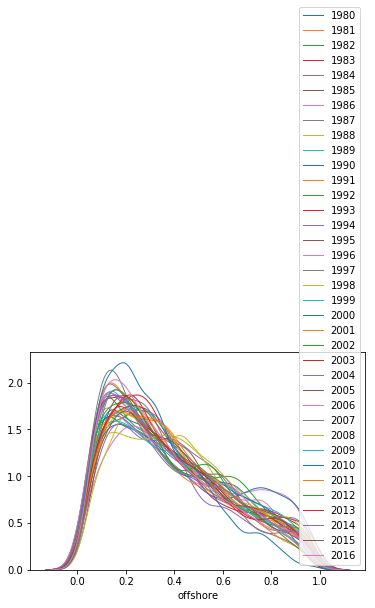

In [14]:
for year in offshore_each_year.year.unique():
    # Subset to the airline
    subset = offshore_each_year[offshore_each_year['year'] == year]
    
    # Draw the density plot
    sns.distplot(subset['offshore'], hist = False, kde = True,
                 kde_kws = {'linewidth': 1},
                 label = year)

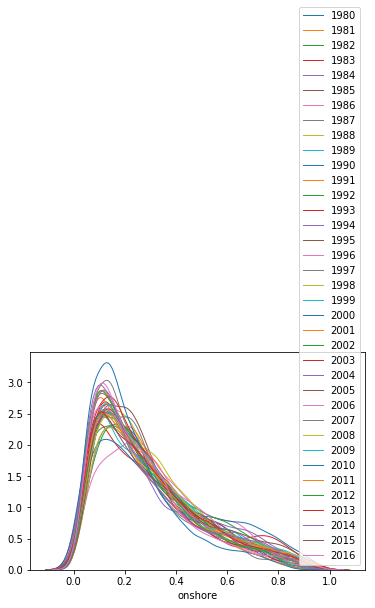

In [13]:
for year in offshore_each_year.year.unique():
    # Subset to the airline
    subset = offshore_each_year[offshore_each_year['year'] == year]
    
    # Draw the density plot
    sns.distplot(subset['onshore'], hist = False, kde = True,
                 kde_kws = {'linewidth': 1},
                 label = year)